In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
masks = pd.read_csv('Mask_Mandates.csv', parse_dates= ['date'])

In [4]:
masks = masks.drop(['Source_of_Action', 'URL', 'Citation'], axis= 1)
masks.head()

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public
0,AL,Autauga County,1,1,2020-04-10,2,NaN
1,AL,Autauga County,1,1,2020-04-11,2,NaN
2,AL,Autauga County,1,1,2020-04-12,2,NaN
3,AL,Autauga County,1,1,2020-04-13,2,NaN
4,AL,Autauga County,1,1,2020-04-14,2,NaN


In [5]:
masks.describe(), masks.describe(include='O')

(         FIPS_State   FIPS_County    order_code
 count  1.593869e+06  1.593869e+06  1.593869e+06
 mean   3.143582e+01  1.027046e+02  1.539415e+00
 std    1.640763e+01  1.065462e+02  4.984442e-01
 min    1.000000e+00  1.000000e+00  1.000000e+00
 25%    1.900000e+01  3.500000e+01  1.000000e+00
 50%    3.000000e+01  7.900000e+01  2.000000e+00
 75%    4.600000e+01  1.330000e+02  2.000000e+00
 max    7.800000e+01  8.400000e+02  2.000000e+00,
        State_Tribe_Territory        County_Name Face_Masks_Required_in_Public
 count                1593869            1593869                        987555
 unique                    56               1968                             2
 top                       TX  Washington County                           Yes
 freq                  125222              14790                        734112)

array([[<AxesSubplot:title={'center':'FIPS_State'}>,
        <AxesSubplot:title={'center':'FIPS_County'}>],
       [<AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'order_code'}>]], dtype=object)

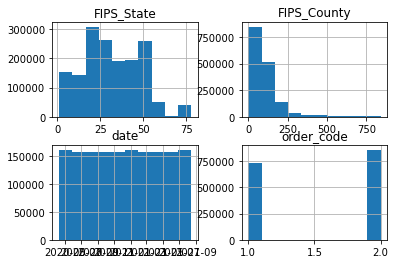

In [6]:
masks.hist()

<AxesSubplot:>

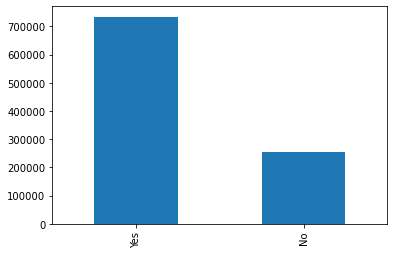

In [7]:
masks['Face_Masks_Required_in_Public'].value_counts().plot(kind='bar')

array([[<AxesSubplot:title={'center':'FIPS_State'}>,
        <AxesSubplot:title={'center':'FIPS_County'}>],
       [<AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'order_code'}>]], dtype=object)

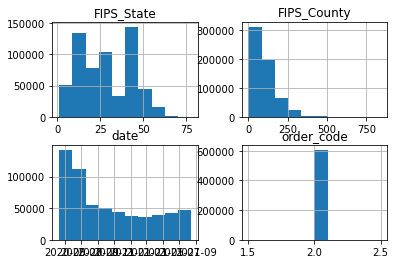

In [8]:
masks[masks['Face_Masks_Required_in_Public'].isna() == True].hist()


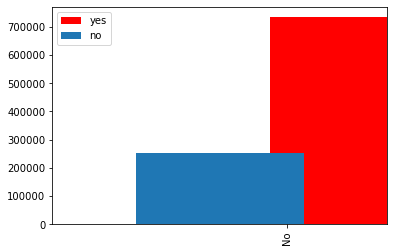

In [9]:
masks[masks['order_code'] == 1]['Face_Masks_Required_in_Public'].value_counts().plot(kind='bar', color= 'r', label= 'yes', position= .1)
masks[masks['order_code'] == 2]['Face_Masks_Required_in_Public'].value_counts().plot(kind='bar', label= 'no', position= .9)
plt.legend()

In [10]:
masks['order_code'] = masks['order_code'].replace(2,0)
masks.rename(columns={'order_code': 'mask_order'}, inplace= True)

In [11]:
masks.isna().sum(), len(masks)

(State_Tribe_Territory                 0
 County_Name                           0
 FIPS_State                            0
 FIPS_County                           0
 date                                  0
 mask_order                            0
 Face_Masks_Required_in_Public    606314
 dtype: int64,
 1593869)

In [12]:
masks1 = masks[['State_Tribe_Territory', 'County_Name', 'FIPS_State', 'FIPS_County',
       'date', 'mask_order']]
masks1.head()

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,mask_order
0,AL,Autauga County,1,1,2020-04-10,0
1,AL,Autauga County,1,1,2020-04-11,0
2,AL,Autauga County,1,1,2020-04-12,0
3,AL,Autauga County,1,1,2020-04-13,0
4,AL,Autauga County,1,1,2020-04-14,0


In [13]:
gatherings = pd.read_csv('Gathering_Bans.csv', parse_dates= ['date'])
gatherings = gatherings.drop(['Source_of_Action', 'URL', 'Citation'], axis= 1)
gatherings.head()

C:\Users\aarme\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7,9,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,General_GB_order_group,General_GB_order_code,General_or_Under_6ft_Bans_Gatherings_Over,Express_Preemption,Indoor_Outdoor
0,AL,Autauga County,1,1,2020-03-11,No order found,1,NaN,NaN,NaN
1,AL,Autauga County,1,1,2020-03-12,No order found,1,NaN,NaN,NaN
2,AL,Autauga County,1,1,2020-03-13,No order found,1,NaN,NaN,NaN
3,AL,Autauga County,1,1,2020-03-14,No order found,1,NaN,NaN,NaN
4,AL,Autauga County,1,1,2020-03-15,No order found,1,NaN,NaN,NaN


In [14]:
gatherings.describe()

,FIPS_State,FIPS_County,General_GB_order_code
count,1.690859e+06,1.690859e+06,1.690859e+06
mean,3.143582e+01,1.027046e+02,3.209515e+00
std,1.640763e+01,1.065462e+02,2.443695e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.900000e+01,3.500000e+01,1.000000e+00
50%,3.000000e+01,7.900000e+01,1.000000e+00
75%,4.600000e+01,1.330000e+02,6.000000e+00
max,7.800000e+01,8.400000e+02,7.000000e+00


In [15]:
gatherings.describe(include='O')

,State_Tribe_Territory,County_Name,General_GB_order_group,General_or_Under_6ft_Bans_Gatherings_Over,Express_Preemption,Indoor_Outdoor
count,1690859,1690859,1690859,1482123,1473636,20883
unique,56,1968,7,27,6,6
top,TX,Washington County,No order found,No ban,Unknown,Outdoor
freq,132842,15690,860382,651646,827198,9983


array([[<AxesSubplot:title={'center':'FIPS_State'}>,
        <AxesSubplot:title={'center':'FIPS_County'}>],
       [<AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'General_GB_order_code'}>]],
      dtype=object)

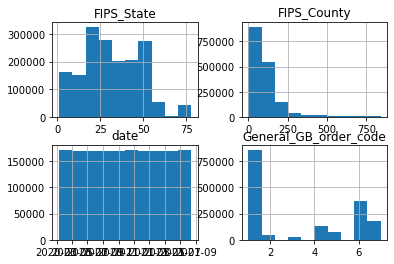

In [16]:
gatherings.hist()

In [17]:
gatherings.isna().sum()

State_Tribe_Territory                              0
County_Name                                        0
FIPS_State                                         0
FIPS_County                                        0
date                                               0
General_GB_order_group                             0
General_GB_order_code                              0
General_or_Under_6ft_Bans_Gatherings_Over     208736
Express_Preemption                            217223
Indoor_Outdoor                               1669976
dtype: int64

In [18]:
gatherings['General_GB_order_group'].unique(),gatherings['General_GB_order_code'].unique()

(array(['No order found', 'Ban of gatherings over 1-10 people',
        'Bans gatherings of any size',
        'Ban of gatherings over 11-25 people',
        'Ban of gatherings over 101 or more people',
        'Ban of gatherings over 26-50 people',
        'Ban of gatherings over 51-100 people'], dtype=object),
 array([1, 6, 7, 5, 2, 4, 3], dtype=int64))

<AxesSubplot:xlabel='General_GB_order_group,General_GB_order_code'>

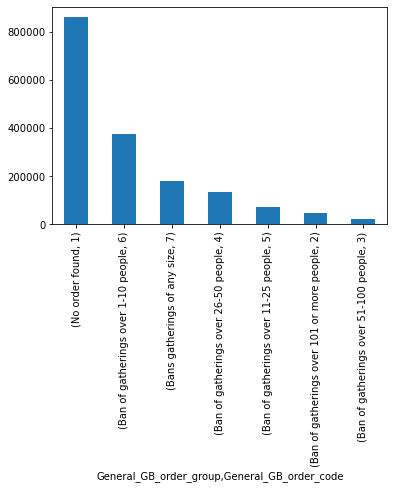

In [19]:
gatherings[['General_GB_order_group', 'General_GB_order_code']].value_counts().plot(kind='bar')

In [20]:
gatherings['General_GB_order_code'] = gatherings['General_GB_order_code'] - 1

In [21]:
gatherings.columns

Index(['State_Tribe_Territory', 'County_Name', 'FIPS_State', 'FIPS_County',
       'date', 'General_GB_order_group', 'General_GB_order_code',
       'General_or_Under_6ft_Bans_Gatherings_Over', 'Express_Preemption',
       'Indoor_Outdoor'],
      dtype='object')

In [22]:
gatherings1 = gatherings[['State_Tribe_Territory', 'County_Name', 'FIPS_State', 'FIPS_County',
       'date', 'General_GB_order_group', 'General_GB_order_code']]
gatherings1.head()

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,General_GB_order_group,General_GB_order_code
0,AL,Autauga County,1,1,2020-03-11,No order found,0
1,AL,Autauga County,1,1,2020-03-12,No order found,0
2,AL,Autauga County,1,1,2020-03-13,No order found,0
3,AL,Autauga County,1,1,2020-03-14,No order found,0
4,AL,Autauga County,1,1,2020-03-15,No order found,0


In [23]:
restaurants = pd.read_csv('Closing_and_Reopening_Restaurants.csv', parse_dates= ['date'])
restaurants = restaurants.drop(['Source_of_Action', 'URL', 'Citation'], axis= 1)
restaurants.head()

C:\Users\aarme\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (9,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,Business_Type,Action,order_code,Percent_Capacity_Outdoor,Percent_Capacity_Indoor,Numeric_Capacity_Outdoor,Numeric_Capacity_Indoor,Limited_Open_Outdoor_Only,Limited_Open_General_Indoor
0,AL,Autauga County,1,1,2020-03-15,Restaurants,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
1,AL,Autauga County,1,1,2020-03-16,Restaurants,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
2,AL,Autauga County,1,1,2020-03-17,Restaurants,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
3,AL,Autauga County,1,1,2020-03-18,Restaurants,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
4,AL,Autauga County,1,1,2020-03-19,Restaurants,Curbside/carryout/delivery only,5,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
restaurants.describe()

,FIPS_State,FIPS_County,order_code
count,1.677927e+06,1.677927e+06,1.677927e+06
mean,3.143582e+01,1.027046e+02,2.878512e+00
std,1.640763e+01,1.065462e+02,9.169881e-01
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.900000e+01,3.500000e+01,2.000000e+00
50%,3.000000e+01,7.900000e+01,3.000000e+00
75%,4.600000e+01,1.330000e+02,3.000000e+00
max,7.800000e+01,8.400000e+02,6.000000e+00


In [25]:
restaurants.describe(include='O')

,State_Tribe_Territory,County_Name,Business_Type,Action,Percent_Capacity_Outdoor,Percent_Capacity_Indoor,Numeric_Capacity_Outdoor,Numeric_Capacity_Indoor,Limited_Open_Outdoor_Only,Limited_Open_General_Indoor
count,1677927,1677927,1677927,1645725,935409,882411,935409,882411,52998,882411
unique,56,1968,1,4,13,14,13,13,1,1
top,TX,Washington County,Restaurants,Open with social distancing/reduced seating/en...,Not specified,Not specified,Not specified,Not specified,Yes,Yes
freq,131826,15570,1677927,922584,715555,336003,852603,763721,52998,882411


In [26]:
restaurants.isna().sum()

State_Tribe_Territory                0
County_Name                          0
FIPS_State                           0
FIPS_County                          0
date                                 0
Business_Type                        0
Action                           32202
order_code                           0
Percent_Capacity_Outdoor        742518
Percent_Capacity_Indoor         795516
Numeric_Capacity_Outdoor        742518
Numeric_Capacity_Indoor         795516
Limited_Open_Outdoor_Only      1624929
Limited_Open_General_Indoor     795516
dtype: int64

<AxesSubplot:xlabel='order_code,Action'>

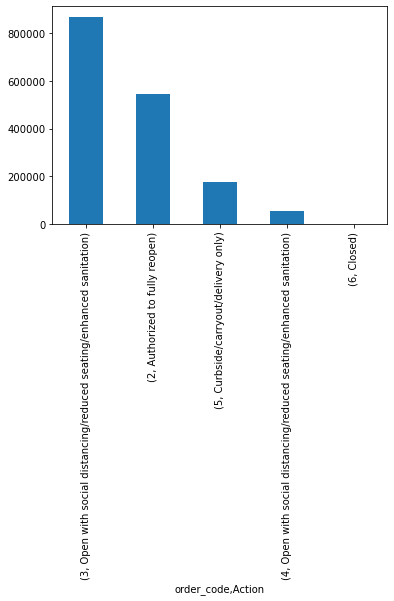

In [27]:
restaurants[['order_code', 'Action']].value_counts().plot(kind='bar')

In [28]:
restaurants['order_code'].unique()

array([1, 5, 3, 2, 4, 6], dtype=int64)

In [49]:
restaurants[restaurants['restaurant_order']==0]

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,Business_Type,Action,restaurant_order,Percent_Capacity_Outdoor,Percent_Capacity_Indoor,Numeric_Capacity_Outdoor,Numeric_Capacity_Indoor,Limited_Open_Outdoor_Only,Limited_Open_General_Indoor
0,AL,Autauga County,1,1,2020-03-15,Restaurants,No order found,0,NaN,NaN,NaN,NaN,NaN,NaN
1,AL,Autauga County,1,1,2020-03-16,Restaurants,No order found,0,NaN,NaN,NaN,NaN,NaN,NaN
2,AL,Autauga County,1,1,2020-03-17,Restaurants,No order found,0,NaN,NaN,NaN,NaN,NaN,NaN
3,AL,Autauga County,1,1,2020-03-18,Restaurants,No order found,0,NaN,NaN,NaN,NaN,NaN,NaN
83,AL,Calhoun County,1,15,2020-03-16,Restaurants,No order found,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677241,PR,Yauco Municipio,72,153,2021-08-11,Restaurants,No order found,0,NaN,NaN,NaN,NaN,NaN,NaN
1677242,PR,Yauco Municipio,72,153,2021-08-12,Restaurants,No order found,0,NaN,NaN,NaN,NaN,NaN,NaN
1677243,PR,Yauco Municipio,72,153,2021-08-13,Restaurants,No order found,0,NaN,NaN,NaN,NaN,NaN,NaN
1677244,PR,Yauco Municipio,72,153,2021-08-14,Restaurants,No order found,0,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
restaurants['Action'].unique()

array([nan, 'Curbside/carryout/delivery only',
       'Open with social distancing/reduced seating/enhanced sanitation',
       'Authorized to fully reopen', 'Closed'], dtype=object)

In [30]:
restaurants[restaurants['order_code'] == 1].isna().sum(),len(restaurants[restaurants['order_code'] == 1])

(State_Tribe_Territory              0
 County_Name                        0
 FIPS_State                         0
 FIPS_County                        0
 date                               0
 Business_Type                      0
 Action                         32202
 order_code                         0
 Percent_Capacity_Outdoor       32202
 Percent_Capacity_Indoor        32202
 Numeric_Capacity_Outdoor       32202
 Numeric_Capacity_Indoor        32202
 Limited_Open_Outdoor_Only      32202
 Limited_Open_General_Indoor    32202
 dtype: int64,
 32202)

In [31]:
restaurants['Action'] = restaurants['Action'].fillna('No order found')
restaurants['order_code'] = restaurants['order_code'] - 1
restaurants.rename(columns= {'order_code': 'restaurant_order'}, inplace= True)

In [32]:
restaurants.columns

Index(['State_Tribe_Territory', 'County_Name', 'FIPS_State', 'FIPS_County',
       'date', 'Business_Type', 'Action', 'restaurant_order',
       'Percent_Capacity_Outdoor', 'Percent_Capacity_Indoor',
       'Numeric_Capacity_Outdoor', 'Numeric_Capacity_Indoor',
       'Limited_Open_Outdoor_Only', 'Limited_Open_General_Indoor'],
      dtype='object')

In [33]:
restaurants1 = restaurants[['State_Tribe_Territory', 'County_Name', 'FIPS_State', 'FIPS_County',
       'date', 'Action', 'restaurant_order']]

In [34]:
homes = pd.read_csv('Stay-At-Home_Orders.csv', parse_dates= ['date'])
homes = homes.drop(['Source_of_Action', 'URL', 'Citation'], axis= 1)
homes.head()

C:\Users\aarme\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,Order_code,Stay_at_Home_Order_Recommendation,Express_Preemption
0,AL,Autauga County,1,1,2020-03-15,7,NaN,NaN
1,AL,Autauga County,1,1,2020-03-16,7,NaN,NaN
2,AL,Autauga County,1,1,2020-03-17,7,NaN,NaN
3,AL,Autauga County,1,1,2020-03-18,7,NaN,NaN
4,AL,Autauga County,1,1,2020-03-19,7,NaN,NaN


In [35]:
homes.describe()

,FIPS_State,FIPS_County,Order_code
count,1.677927e+06,1.677927e+06,1.677927e+06
mean,3.143582e+01,1.027046e+02,6.036095e+00
std,1.640763e+01,1.065462e+02,1.573799e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.900000e+01,3.500000e+01,6.000000e+00
50%,3.000000e+01,7.900000e+01,7.000000e+00
75%,4.600000e+01,1.330000e+02,7.000000e+00
max,7.800000e+01,8.400000e+02,7.000000e+00


In [36]:
homes.describe(include='O')

,State_Tribe_Territory,County_Name,Stay_at_Home_Order_Recommendation,Express_Preemption
count,1677927,1677927,1461933,1448788
unique,56,1968,6,5
top,TX,Washington County,Advisory/Recommendation,Unknown
freq,131826,15570,643866,773058


In [37]:
print(len(homes))
homes.isna().sum()

1677927


State_Tribe_Territory                     0
County_Name                               0
FIPS_State                                0
FIPS_County                               0
date                                      0
Order_code                                0
Stay_at_Home_Order_Recommendation    215994
Express_Preemption                   229139
dtype: int64

In [50]:
homes['Stay_at_Home_Order_Recommendation'].unique()

array([nan, 'Mandatory for all individuals', 'Advisory/Recommendation',
       'No order for individuals to stay home',
       'Mandatory only for all individuals in certain areas of the jurisdiction',
       'Mandatory only for at-risk individuals in the jurisdiction',
       'Mandatory only for at-risk individuals in certain areas of the jurisdiction'],
      dtype=object)

<AxesSubplot:xlabel='Order_code,Stay_at_Home_Order_Recommendation'>

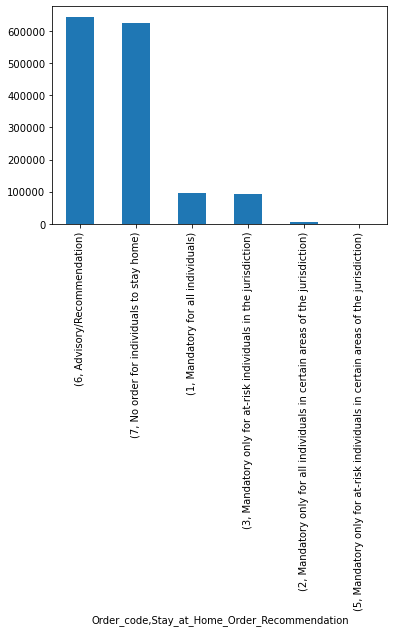

In [38]:
homes[['Order_code', 'Stay_at_Home_Order_Recommendation']].value_counts().plot(kind= 'bar')

<AxesSubplot:>

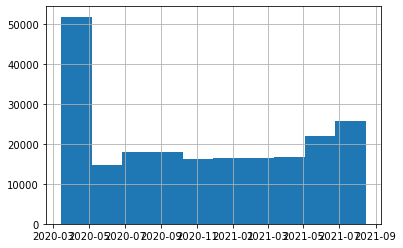

In [39]:
homes[homes['Stay_at_Home_Order_Recommendation'].isna()==True]['date'].hist()

In [40]:
homes.columns

Index(['State_Tribe_Territory', 'County_Name', 'FIPS_State', 'FIPS_County',
       'date', 'Order_code', 'Stay_at_Home_Order_Recommendation',
       'Express_Preemption'],
      dtype='object')

In [41]:
homes1 = homes[['State_Tribe_Territory', 'County_Name', 'FIPS_State', 'FIPS_County',
       'date', 'Order_code', 'Stay_at_Home_Order_Recommendation']]

In [42]:
reg_df1 = homes1.merge(restaurants1, on = ['State_Tribe_Territory', 'County_Name', 'FIPS_State', 'FIPS_County', 'date'])
reg_df1

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,Order_code,Stay_at_Home_Order_Recommendation,Action,restaurant_order
0,AL,Autauga County,1,1,2020-03-15,7,NaN,No order found,0
1,AL,Autauga County,1,1,2020-03-16,7,NaN,No order found,0
2,AL,Autauga County,1,1,2020-03-17,7,NaN,No order found,0
3,AL,Autauga County,1,1,2020-03-18,7,NaN,No order found,0
4,AL,Autauga County,1,1,2020-03-19,7,NaN,Curbside/carryout/delivery only,4
...,...,...,...,...,...,...,...,...,...
1677922,VI,St. Thomas Island,78,30,2021-08-11,6,Advisory/Recommendation,Open with social distancing/reduced seating/en...,2
1677923,VI,St. Thomas Island,78,30,2021-08-12,6,Advisory/Recommendation,Open with social distancing/reduced seating/en...,2
1677924,VI,St. Thomas Island,78,30,2021-08-13,6,Advisory/Recommendation,Open with social distancing/reduced seating/en...,2
1677925,VI,St. Thomas Island,78,30,2021-08-14,6,Advisory/Recommendation,Open with social distancing/reduced seating/en...,2


In [43]:
reg_df1 = reg_df1.merge(gatherings1, on = ['State_Tribe_Territory', 'County_Name', 'FIPS_State', 'FIPS_County', 'date'], suffixes= ('_home', '_gatherings'))
reg_df1.columns

Index(['State_Tribe_Territory', 'County_Name', 'FIPS_State', 'FIPS_County',
       'date', 'Order_code', 'Stay_at_Home_Order_Recommendation', 'Action',
       'restaurant_order', 'General_GB_order_group', 'General_GB_order_code'],
      dtype='object')

In [44]:
reg_df1 = reg_df1.merge(masks1, on = ['State_Tribe_Territory', 'County_Name', 'FIPS_State', 'FIPS_County', 'date'], suffixes= ('_restaurants', '_masks') )

In [45]:
reg_df1.columns

Index(['State_Tribe_Territory', 'County_Name', 'FIPS_State', 'FIPS_County',
       'date', 'Order_code', 'Stay_at_Home_Order_Recommendation', 'Action',
       'restaurant_order', 'General_GB_order_group', 'General_GB_order_code',
       'mask_order'],
      dtype='object')

In [46]:
reg_df1.shape

(1593869, 12)

In [56]:
reg_df1.dtypes

State_Tribe_Territory                        object
County_Name                                  object
FIPS_State                                    int64
FIPS_County                                   int64
date                                 datetime64[ns]
Order_code                                    int64
Stay_at_Home_Order_Recommendation            object
Action                                       object
restaurant_order                              int64
General_GB_order_group                       object
General_GB_order_code                         int64
mask_order                                    int64
dtype: object

In [57]:
reg_df1.to_csv('regulations1.csv')

In [17]:
reg_df['Stay_at_Home_Order_Recommendation']

0          Mandatory for all individuals
1          Mandatory for all individuals
2          Mandatory for all individuals
3          Mandatory for all individuals
4          Mandatory for all individuals
                       ...              
1593864          Advisory/Recommendation
1593865          Advisory/Recommendation
1593866          Advisory/Recommendation
1593867          Advisory/Recommendation
1593868          Advisory/Recommendation
Name: Stay_at_Home_Order_Recommendation, Length: 1593869, dtype: object